<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr1/blob/Kiparenko-Nikolai-folder/Kiparenko%20Nikolai/INSPECTRUM_CLINIC_HR_RECSYS_GR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Работа с массивами данных
import numpy as np 

# Работа с таблицами
import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, ReLU 

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Заполнение последовательностей до определенной длины
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Кодирование тестовых меток
from sklearn.preprocessing import LabelEncoder

# Разбиение на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split

# автоматически парсит строку и сохранит ее в переменной datetime
import datetime

# Загрузка датасетов из облака google
import gdown

# Функции операционной системы
import os

# Работа со временем
import time

# Регулярные выражения
import re

# Запись в файлы и чтение из файлов структур данных Python
import pickle

# Отрисовка графиков
import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:
import gdown                                      # Подключим функцию gdown
#Грузим файл
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_HR/datasets/%D0%94%D0%B0%D1%82%D0%B0%D0%A1%D0%B5%D1%82%20%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5%20581%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5.xlsx','dataS.xlsx', quiet=True)   

'dataS.xlsx'

In [ ]:
#Читаем файл
data = pd.read_excel (r'dataS.xlsx', index_col=0)
data.max_columns = 30
data.columns = ['Response_date', 'Full_name', 'Gender', 'Salary', 'Job', 'City', 'Employment', 'Schedule', 'Experience', 'Last_place', 'Position', 'Education', 'Update_resume', 'Suitable']

In [ ]:
data.head(5)

,Response_date,Full_name,Gender,Salary,Job,City,Employment,Schedule,Experience,Last_place,Position,Education,Update_resume,Suitable,Birth,Age,DegreeOfStudy,YearOfGraduation
0,1684859882,Bessonova Mariya,0,90000,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","0, 4, 3",1,70,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",1684859882,да,1684859882,0,Высшее,2023
1,1684859882,Ефремова Екатерина Вячеславовна,0,0,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",3,"1, 2, 3",143,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский худ...",1684859882,да,1684859882,0,Высшее,2022
2,1684859882,Фролов Артур Михайлович,1,150000,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","0, 4, 3","1, 2, 3",86,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государствен...",1684859882,да,1684859882,33,Высшее,2013
3,1684859882,Хозаев Расул Шагаманович,1,0,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","5, 4, 3","1, 2, 3",106,WeInvest,Product Manager (team leader),"Магистр, 2014, Московский государственный техн...",1684859882,да,1684859882,32,Магистр,2014
4,1684859882,Шадрин Олег Михайлович,1,150000,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","0, 4, 3","1, 2, 3",69,Индивидуальное предпринимательство / частная п...,Product/Project manager,"Высшее, 2021, Российская академия народного хо...",1684859882,да,1684859882,26,Высшее,2021


In [ ]:
#Разбираем Дату раждения
Birth = data['Gender'].apply(lambda x: x.split(',')[2].strip() if len(x.split(','))>2 else '')
data = data.assign(Birth=Birth)
#Разбираем Возраст
Age = data['Gender'].apply(lambda x: x.split(',')[1].strip() if len(x.split(','))>1 else '')
data = data.assign(Age=Age)

In [ ]:
#Тип образования
DegreeOfStudy = data['Education'].apply(lambda x: x.split(',')[0].strip() if len(x.split(','))>1 else '')
data = data.assign(DegreeOfStudy=DegreeOfStudy)
#Год окончания образования
YearOfGraduation = data['Education'].apply(lambda x: x.split(',')[1].strip() if len(x.split(','))>1 else '')
data = data.assign(YearOfGraduation=YearOfGraduation)

In [ ]:
#Формируем список месяцев
month_name = {1: 'января', 2: 'февраля', 3: 'марта', 4: 'апреля', 5: 'мая', 6: 'июня',
      7: 'июля', 8: 'августа', 9: 'сентября', 10: 'октября', 11: 'ноября', 12: 'декабря'}


In [ ]:
for i, row in data.iterrows():
  #Gender
  row.Gender = row.Gender.split(',')[0].strip() 
  #Женщина = 0, Мужчина = 1
  row.Gender = row.Gender.replace('Женщина','0')
  row.Gender = row.Gender.replace('Мужчина','1')
  row.Gender = int(row.Gender)

  #Birth
  row.Birth = row.Birth.replace('родился','')
  row.Birth = row.Birth.replace('родилась','')
 
  #Age
  row.Age = row.Age.replace('года','')
  row.Age = row.Age.replace('год','')
  row.Age = row.Age.replace('лет','')
  row.Age = row.Age='' if 0 else row.Age

  try:
    row.Age = int(row.Age)
  except (IndexError, TypeError, ValueError):
    print(row.Age)
    row.Age = 0

  try:
      row.YearOfGraduation = int(row.YearOfGraduation)
  except (IndexError, TypeError, ValueError):
      print(row.YearOfGraduation)
      row.YearOfGraduation = 0

  #Salary
  row.Salary = row.Salary.replace(' ','') 
  row.Salary = str(float(row.Salary.replace('KGS',''))*0.89)      if row.Salary.find('KGS') != -1 else row.Salary
  row.Salary = str(float(row.Salary.replace('KZT',''))*0.18)      if row.Salary.find('KZT') != -1 else row.Salary
  row.Salary = str(float(row.Salary.replace('USD',''))*78.00)     if row.Salary.find('USD') != -1 else row.Salary
  row.Salary = str(float(row.Salary.replace('EUR',''))*85.00)     if row.Salary.find('EUR') != -1 else row.Salary
  row.Salary = row.Salary.replace('руб.','')
  row.Salary = row.Salary.replace('руб','')
  row.Salary = row.Salary.replace('неуказана','0')
  row.Salary = int(float(row.Salary)) 

  #Experience
  row.Experience = row.Experience.replace('Опыт работы —','')
  row.Experience = row.Experience.replace('Опыт работы','')
  row.Experience = row.Experience.replace('года',';')
  row.Experience = row.Experience.replace('лет',';')
  row.Experience = row.Experience.replace('годов',';')
  row.Experience = row.Experience.replace('год',';')
  row.Experience = row.Experience.replace('года',';')
  row.Experience = row.Experience.replace('месяцев','')
  row.Experience = row.Experience.replace('месяца','')
  row.Experience = row.Experience.replace('месяц','')
  row.Experience = row.Experience.replace('нет','0')
  #Приводим к месяцам, если были года умножаем на 12 иначе берем как есть 
  row.Experience = (int(row.Experience.split(';')[0].strip()) * 12 + (int(row.Experience.split(';')[1].strip())) if row.Experience.split(';')[1].strip() != '' else int(row.Experience.split(';')[0].strip()) * 12) if len(row.Experience.split(';')) >1 else int(row.Experience.strip()) 

  #Schedule
  #вахтовый метод = 0, удаленная работа = 1, гибкий график = 2, полный день = 3, сменный график = 4
  row.Schedule = row.Schedule.replace('вахтовый метод','0')
  row.Schedule = row.Schedule.replace('удаленная работа','1')
  row.Schedule = row.Schedule.replace('гибкий график','2')
  row.Schedule = row.Schedule.replace('полный день','3')
  row.Schedule = row.Schedule.replace('сменный график','4')

  #Employment
  #проектная работа = 0, неполный рабочий день = 1, полный рабочий день = 2, полная занятость = 3, частичная занятость = 4, стажировка = 5, волонтерство = 6
  row.Employment = row.Employment.replace('проектная работа','0')
  row.Employment = row.Employment.replace('неполный рабочий день','1')
  row.Employment = row.Employment.replace('полный рабочий день','2')
  row.Employment = row.Employment.replace('полная занятость','3')
  row.Employment = row.Employment.replace('частичная занятость','4')
  row.Employment = row.Employment.replace('стажировка','5')
  row.Employment = row.Employment.replace('волонтерство','6')

  #Birth
  for i in month_name:
     row.Birth         = row.Birth.replace(month_name[i],'-'+str(i)+'-')
 
  row.Birth         = row.Birth.replace('родился','')
  row.Birth         = row.Birth.replace('родилась','')
  row.Birth         = row.Birth.replace(' -','-')
  row.Birth         = row.Birth.replace('- ','-')
  row.Birth         = row.Birth+' 00:00:00'

  row.Birth = '1-1-1' +row.Birth if row.Birth == ' 00:00:00' else row.Birth
  day = int(row.Birth.split('-')[0].strip()) 
  month = int(row.Birth.split('-')[1].strip()) 
  year = row.Birth.split('-')[2].strip() 
  time = year.split(' ')[1].strip()
  year = int(year.split(' ')[0].strip())

  row.Birth = int(datetime.datetime(year,month,day).utcnow().timestamp())

  #Update_resume 
  for i in month_name:
    row.Update_resume = row.Update_resume.replace(month_name[i],'-'+str(i)+'-')
 
  row.Update_resume = row.Update_resume.replace('в','')
  row.Update_resume = row.Update_resume.replace(' -','-')
  row.Update_resume = row.Update_resume.replace('- ','-')
  row.Update_resume = row.Update_resume+':00'

  day = int(row.Update_resume.split('-')[0].strip()) 
  month = int(row.Update_resume.split('-')[1].strip()) 
  year = row.Update_resume.split('-')[2].strip() 
  year = year.replace('  ',';')
  year = year.replace(' ',';')
   
  time = year.split(';')[1].strip()
  year = int(year.split(';')[0].strip())
  hour = int(time.split(':')[0].strip())
  minute = int(time.split(':')[1].strip())

  row.Update_resume = int(datetime.datetime(year,month,day,hour,minute,0).utcnow().timestamp())

  #Response_date
  row.Response_date = int(datetime.datetime.utcnow().timestamp())

In [ ]:
#Переведем в бинарные значения

#проектная работа = 0, неполный рабочий день = 1, полный рабочий день = 2, полная занятость = 3, частичная занятость = 4, стажировка = 5, волонтерство = 6
Employment_0 = data['Employment'].apply(lambda x: 1 if x.find('0') else 0)
Employment_1 = data['Employment'].apply(lambda x: 1 if x.find('1') else 0)
Employment_2 = data['Employment'].apply(lambda x: 1 if x.find('2') else 0)
Employment_3 = data['Employment'].apply(lambda x: 1 if x.find('3') else 0)
Employment_4 = data['Employment'].apply(lambda x: 1 if x.find('4') else 0)
Employment_5 = data['Employment'].apply(lambda x: 1 if x.find('5') else 0)
Employment_6 = data['Employment'].apply(lambda x: 1 if x.find('6') else 0)

data = data.assign(Employment_0=Employment_0,
                    Employment_1=Employment_1,
                    Employment_2=Employment_2,
                    Employment_3=Employment_3,
                    Employment_4=Employment_4,
                    Employment_5=Employment_5,
                    Employment_6=Employment_6)

#вахтовый метод = 0, удаленная работа = 1, гибкий график = 2, полный день = 3, сменный график = 4
Schedule_0 = data['Schedule'].apply(lambda x: 1 if x.find('0') else 0)
Schedule_1 = data['Schedule'].apply(lambda x: 1 if x.find('1') else 0)
Schedule_2 = data['Schedule'].apply(lambda x: 1 if x.find('2') else 0)
Schedule_3 = data['Schedule'].apply(lambda x: 1 if x.find('3') else 0)
Schedule_4 = data['Schedule'].apply(lambda x: 1 if x.find('4') else 0)

data = data.assign(Schedule_0=Schedule_0,
                    Schedule_1=Schedule_1,
                    Schedule_2=Schedule_2,
                    Schedule_3=Schedule_3,
                    Schedule_4=Schedule_4)

data = data.drop(columns=['Schedule', 'Employment'])

In [ ]:
#City
tokenizer = Tokenizer(num_words=30, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(data.City) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности
City_Indexes = tokenizer.texts_to_sequences(data.City)
data = data.assign(City=City_Indexes)

In [ ]:
#Full_name
tokenizer = Tokenizer(num_words=100, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(data.Full_name)

Full_name_Indexes = tokenizer.texts_to_sequences(data.Full_name) 
data = data.assign(Full_name=Full_name_Indexes)

In [ ]:
#Education
tokenizer = Tokenizer(num_words=200, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(data.Education) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

Education_Indexes = tokenizer.texts_to_sequences(data.Education) 
data = data.assign(Education=Education_Indexes)

In [ ]:
#DegreeOfStudy
tokenizer = Tokenizer(num_words=20, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(data.DegreeOfStudy) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

DegreeOfStudy_Indexes = tokenizer.texts_to_sequences(data.DegreeOfStudy) 
data = data.assign(DegreeOfStudy=DegreeOfStudy_Indexes)

In [ ]:
#Job
tokenizer = Tokenizer(num_words=150, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(data.Job) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

Job_Indexes = tokenizer.texts_to_sequences(data.Job) 
data = data.assign(Job=Job_Indexes)

In [ ]:
#Last_place
tokenizer = Tokenizer(num_words=150, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(data.Last_place) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

Last_place_Indexes = tokenizer.texts_to_sequences(data.Last_place) 
data = data.assign(Last_place=Last_place_Indexes)

In [ ]:
#Position
tokenizer = Tokenizer(num_words=150, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(data.Position) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности

Position_Indexes = tokenizer.texts_to_sequences(data.Position) 
data = data.assign(Position=Position_Indexes)

In [ ]:
#Suitable
#Список ответов делаем
listAnswers = []
#Обработаем отдельно колонку с ответами
for i, row in data.iterrows():
   a = 1 if str(row.Suitable).find('да') != -1 else 0
   listAnswers.append([a])
answers = np.array(listAnswers)
print(answers.shape)

(579, 1)


In [ ]:
data = data.drop(columns=['Suitable'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 581
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Response_date     579 non-null    int64 
 1   Full_name         579 non-null    object
 2   Gender            579 non-null    int64 
 3   Salary            579 non-null    int64 
 4   Job               579 non-null    object
 5   City              579 non-null    object
 6   Experience        579 non-null    object
 7   Last_place        579 non-null    object
 8   Position          579 non-null    object
 9   Education         579 non-null    object
 10  Update_resume     579 non-null    int64 
 11  Birth             579 non-null    int64 
 12  Age               579 non-null    int64 
 13  DegreeOfStudy     579 non-null    object
 14  YearOfGraduation  579 non-null    int64 
 15  Employment_0      579 non-null    int64 
 16  Employment_1      579 non-null    int64 
 17  Employment_2    

In [ ]:
#Приведим все списки к однообразию
data.Response_date = data.Response_date.astype('int')
data.Gender = data.Gender.astype('int')
data.Salary = data.Salary.astype('int')
data.Update_resume = data.Update_resume.astype('int')
data.Birth = data.Birth.astype('int')
data.Age = data.Age.astype('int')
data.YearOfGraduation = data.YearOfGraduation.astype('int')

#Находим максимальную длину
Full_nameMaxI = 0
PositionMaxI = 0
Last_placeMaxI = 0
JobMaxI = 0
EducationMaxI = 0
CityMaxI = 0
DegreeOfStudyMaxI = 0
for i, row in data.iterrows():
    Full_nameMaxI   = max(Full_nameMaxI,len(row.Full_name))
    PositionMaxI    = max(PositionMaxI,len(row.Position))
    Last_placeMaxI  = max(Last_placeMaxI,len(row.Last_place))
    JobMaxI         = max(JobMaxI,len(row.Job))
    EducationMaxI   = max(EducationMaxI,len(row.Education))
    CityMaxI        = max(CityMaxI,len(row.City))
    DegreeOfStudyMaxI        = max(DegreeOfStudyMaxI,len(row.DegreeOfStudy))

In [ ]:
#обрабатываем данные list
dataList = [] 
for i, row in data.iterrows():
      row.Full_name     = np.array(row.Full_name+[0 for x in range(Full_nameMaxI-len(row.Full_name))])
      row.Position      = np.array(row.Position+[0 for x in range(PositionMaxI-len(row.Position))])
      row.Last_place    = np.array(row.Last_place+[0 for x in range(Last_placeMaxI-len(row.Last_place))])
      row.Job           = np.array(row.Job+[0 for x in range(JobMaxI-len(row.Job))])
      row.Education     = np.array(row.Education+[0 for x in range(EducationMaxI-len(row.Education))])
      row.City          = np.array(row.City+[0 for x in range(CityMaxI-len(row.City))])
      row.DegreeOfStudy          = np.array(row.DegreeOfStudy+[0 for x in range(DegreeOfStudyMaxI-len(row.DegreeOfStudy))])
       
      #row_data = np.hstack(row)
      row_data = np.hstack([
                            row.Full_name,
                            row.Position,
                            row.Last_place,
                            row.Job,
                            row.Education,
                            row.City,
                            row.Response_date,
                            row.Gender,
                            row.Salary,
                            row.Update_resume,
                            row.Birth,
                            row.Age,
                            row.YearOfGraduation,
                            row.DegreeOfStudy,
                            row.Employment_0,
                            row.Employment_1,
                            row.Employment_2,
                            row.Employment_3,
                            row.Employment_4,
                            row.Employment_5,
                            row.Employment_6,
                            row.Schedule_0,
                            row.Schedule_1,
                            row.Schedule_2,
                            row.Schedule_3,
                            row.Schedule_4]
                          )
      
      dataList.append(row_data)

dataset = np.array(dataList) #, dtype=np.float
print(dataset.shape)

(579, 217)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 581
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Response_date     579 non-null    int64 
 1   Full_name         579 non-null    object
 2   Gender            579 non-null    int64 
 3   Salary            579 non-null    int64 
 4   Job               579 non-null    object
 5   City              579 non-null    object
 6   Experience        579 non-null    object
 7   Last_place        579 non-null    object
 8   Position          579 non-null    object
 9   Education         579 non-null    object
 10  Update_resume     579 non-null    int64 
 11  Birth             579 non-null    int64 
 12  Age               579 non-null    int64 
 13  DegreeOfStudy     579 non-null    object
 14  YearOfGraduation  579 non-null    int64 
 15  Employment_0      579 non-null    int64 
 16  Employment_1      579 non-null    int64 
 17  Employment_2    

In [ ]:
#Смотрим что получилось
data.max_columns = 30
data.head(-15)

In [ ]:
for row in dataset:
    print(dataset)

In [ ]:
# Делаем выборки для обучения
x_train, x_test, y_train, y_test = train_test_split(dataset, # набор параметров
                                                    answers, # набор меток классов
                                                    test_size=0.2, # процент в тестовую
                                                    shuffle=True, #  перемешивание
                                                    random_state=3) # воспроизводимость

In [ ]:
x_train.shape

(463, 217)

In [ ]:
# Оптимизаторы
from tensorflow.keras.optimizers import Adam
# Основные слои
from tensorflow.keras.layers import ReLU, Flatten

# Создание последовательной модели
model = Sequential()
#model.add(Dense(60, activation='relu',input_dim=x_train.shape[1]))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(BatchNormalization(input_dim=x_train.shape[1]))
model.add(Dense(30, activation='relu'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
#model.add(Flatten())
#model.add(Dense(10, activation='softmax'))
#model.add(Activation('relu'))
#model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid')) #softmax linear

# Компиляция модели
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])

#model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

# Обучение сети
history = model.fit(x_train, 
                    y_train, #y_train
                    batch_size=16, 
                    epochs=30,
                    validation_split=0.1, 
                    verbose=1)

Epoch 1/30
26/26 [==============================] - 1s 10ms/step - loss: 0.3387 - accuracy: 0.9279 - val_loss: 0.2643 - val_accuracy: 0.9574
Epoch 2/30
26/26 [==============================] - 0s 4ms/step - loss: 0.1107 - accuracy: 0.9808 - val_loss: 0.3635 - val_accuracy: 0.9574
Epoch 3/30
26/26 [==============================] - 0s 4ms/step - loss: 0.0807 - accuracy: 0.9808 - val_loss: 0.3601 - val_accuracy: 0.9574
Epoch 4/30
26/26 [==============================] - 0s 4ms/step - loss: 0.0904 - accuracy: 0.9808 - val_loss: 0.3431 - val_accuracy: 0.9574
Epoch 5/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9808 - val_loss: 0.3565 - val_accuracy: 0.9574
Epoch 6/30
26/26 [==============================] - 0s 4ms/step - loss: 0.0656 - accuracy: 0.9808 - val_loss: 0.3592 - val_accuracy: 0.9574
Epoch 7/30
26/26 [==============================] - 0s 4ms/step - loss: 0.0617 - accuracy: 0.9808 - val_loss: 0.3574 - val_accuracy: 0.9574
Epoch 8/30
26/26 [=

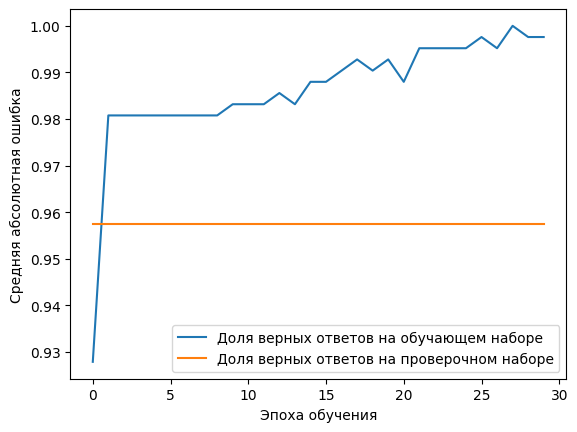

In [ ]:
# Визуализация точности на обучающей выборке
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе') #mae
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе') #val_mae
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Проверка работы сети - предсказание на тренировочной выборке
pred = model.predict(x_train)

# Расчет среднего значения ошибки 
print((abs(pred - y_train)).mean())         # Расчет вручную
print(mean_absolute_error(pred, y_train))   # Расчет с помощью готовой функции

15/15 [==============================] - 0s 3ms/step
0.034243777846881304
0.034243777846881304
